In [1]:
import pandas as p
import matplotlib.pyplot as mp
import numpy as np

In [2]:

import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_141f3ae967834c1b92a2ba193b04beea = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='MYEvgnz8AJ-pNnHq6f4kDemf-qFu8WPW_8bFQ-mVlpPK',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_141f3ae967834c1b92a2ba193b04beea.get_object(Bucket='mlmini-donotdelete-pr-6m041gt1mfjdzm',Key='Bank_Personal_Loan_Modelling-1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
dataset = p.read_csv(body)
dataset.head()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


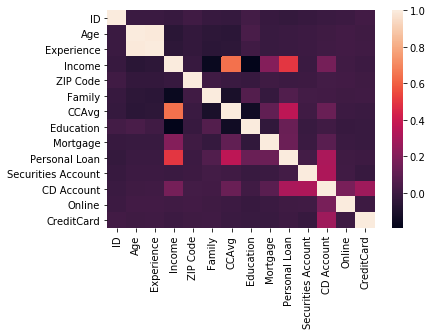

In [3]:
import seaborn as s
s.heatmap(dataset.corr())

In [4]:
dataset.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [5]:
dataset.drop(['ID','ZIP Code','Experience','Family'],axis=1,inplace=True)

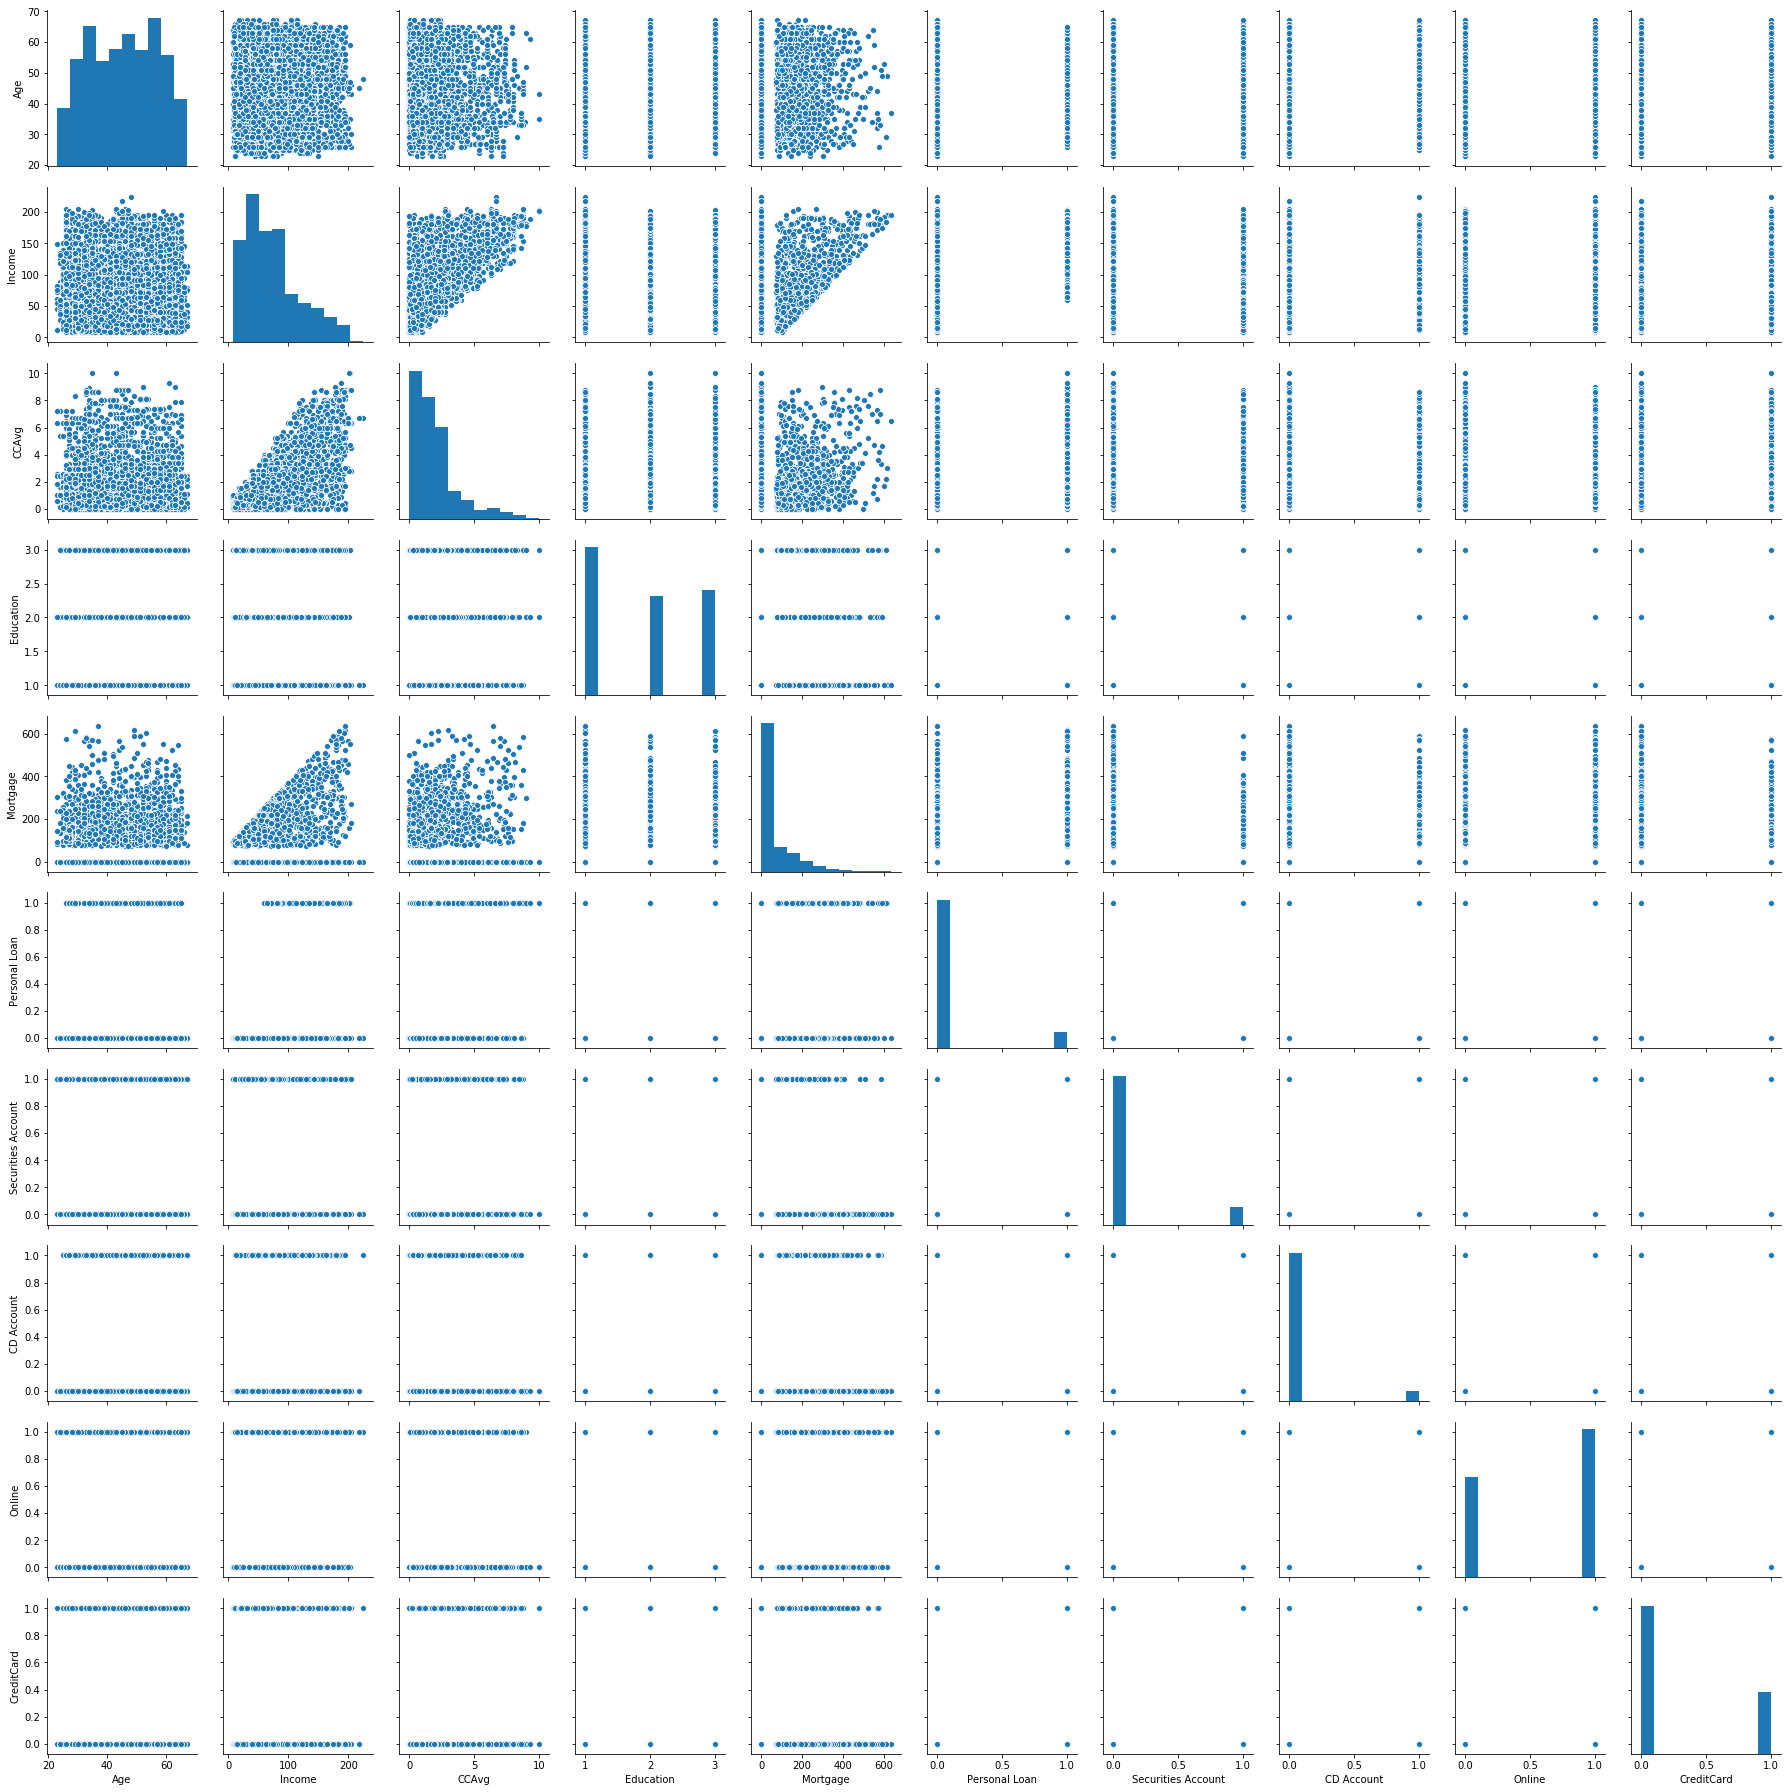

In [6]:
import seaborn as s
s.pairplot(dataset)

In [7]:
op = dataset.iloc[:,5].values
dataset.drop('Personal Loan',axis=1,inplace=True)
inp = dataset.iloc[:,:].values

In [8]:
from sklearn.model_selection import train_test_split as tts
inp_train,inp_test,op_train,op_test = tts(inp,op,test_size=0.3,random_state=0)

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10,criterion = 'entropy' , random_state=0)
rf.fit(inp_train,op_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [10]:
op_pred = rf.predict(inp_test)

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(op_test,op_pred)*100

96.84986595174263

In [12]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient
wml_credentials={
  "apikey": "qtocwoT3UUj5nFocjJnd0jHOczKAbSU3-Y9eFoWt_Xpq",
  "iam_apikey_description": "Auto-generated for key 7acdd747-7c3e-4c3a-aa2d-5324545bcea8",
  "iam_apikey_name": "Service credentials-1",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/c064054833b0492f91124514bf89ddc8::serviceid:ServiceId-c92bfa6e-69fb-42ae-b09d-397c9a5ecadd",
  "instance_id": "f15a8b16-4bcb-46de-9a42-229825364609",
  "url": "https://us-south.ml.cloud.ibm.com"
}
client = WatsonMachineLearningAPIClient(wml_credentials)

2020-01-18 09:14:28,187 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [13]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "AbhiRam", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "srinviasnaidu.mummidi@gmail.com", 
               client.repository.ModelMetaNames.NAME: "Loan"}
model_artifact=client.repository.store_model(rf, meta_props=model_props)

In [14]:
client.repository.list()

------------------------------------  --------------------  ------------------------  -----------------  -----------------
GUID                                  NAME                  CREATED                   FRAMEWORK          TYPE
44a95cb5-21da-49e2-860a-e878144155d7  Loan                  2020-01-18T09:14:34.355Z  scikit-learn-0.20  model
10b4d353-5ca1-4803-b8ae-42ce698fc7da  Loan                  2020-01-18T08:39:44.553Z  scikit-learn-0.20  model
ff98cd5a-64b1-4fb8-b6e5-dd15b711d255  Ram_Loan_Prediction   2020-01-18T06:44:08.656Z  scikit-learn-0.20  model
3af44b5b-ee21-4298-aff3-c43483ec786e  Ram_LinearRegression  2020-01-13T07:41:50.710Z  scikit-learn-0.20  model
fe598e61-c2d9-4543-b107-3b323acc4312  LP                    2020-01-18T08:42:16.928Z  scikit-learn-0.20  online deployment
93c987a4-396c-45a3-b021-62894f17a327  Ram_LoanPrediction    2020-01-18T06:46:10.558Z  scikit-learn-0.20  online deployment
17e12721-e92f-47e1-8dbd-0924fb1120d1  Ram_LinearRegression  2020-01-13T07:46:

In [15]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [16]:
created_deployment = client.deployments.create(published_model_uid, name="LP")



#######################################################################################

Synchronous deployment creation for uid: '44a95cb5-21da-49e2-860a-e878144155d7' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='9a352c6c-14c4-44da-9709-1d76e57ad6f2'
------------------------------------------------------------------------------------------------




In [17]:
scoring_endpoint = client.deployments.get_scoring_url(created_deployment)
print(scoring_endpoint)

https://us-south.ml.cloud.ibm.com/v3/wml_instances/f15a8b16-4bcb-46de-9a42-229825364609/deployments/9a352c6c-14c4-44da-9709-1d76e57ad6f2/online
